Średnie oryginalne: [ 110.         4380.51223476]
Odchylenia standardowe: [  63.50590524 3475.03195596]

Wariancja wyjaśniona PC1: 1.7404
Wariancja wyjaśniona PC2: 0.2779
Kąt obrotu PC1: 45.00 stopni


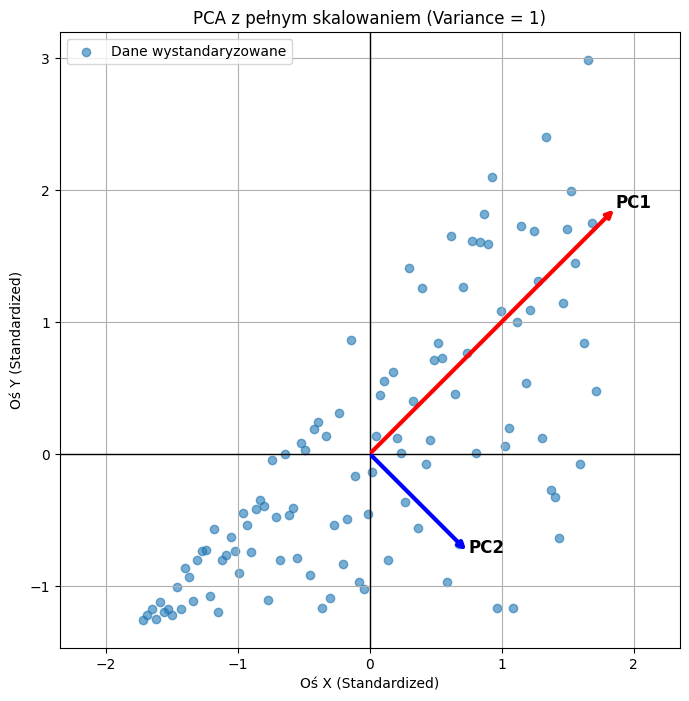

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#1.Wczytanie danych
file_path = 'war5.csv'
df = pd.read_csv(file_path, sep=None, engine='python', decimal=',')
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Wybieramy dane (X to kolumna 0, Y to ostatnia kolumna)
X_raw = df.iloc[:, [0, -1]].values
n = X_raw.shape[0]

#2.Centrowanie i skalowanie (Standaryzacja)
# Obliczamy średnią i odchylenie standardowe dla każdej kolumny
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)

# B = (X - średnia) / odchylenie_standardowe
# To sprawia, że każda kolumna ma średnią 0 i wariancję 1
B = (X_raw - X_mean) / X_std

#3.SVD na danych wystandaryzowanych
U, S, VT = np.linalg.svd(B, full_matrices=False)

# Wariancja wyjaśniona (lambda_k = sigma_k^2 / (n-1))
# W tej wersji suma wariancji powinna być równa liczbie kolumn (czyli 2)
variances = (S**2) / (n - 1)

#Główne składowe (wektory własne)
v1 = VT[0, :]
v2 = VT[1, :]

#Kąt obrotu w przestrzeni wystandaryzowanej
angle_deg = np.degrees(np.arctan2(v1[1], v1[0]))

print(f"Średnie oryginalne: {X_mean}")
print(f"Odchylenia standardowe: {X_std}")
print(f"\nWariancja wyjaśniona PC1: {variances[0]:.4f}")
print(f"Wariancja wyjaśniona PC2: {variances[1]:.4f}")
print(f"Kąt obrotu PC1: {angle_deg:.2f} stopni")

#4. Wizualizacja
plt.figure(figsize=(8, 8))
# Rysujemy dane wystandaryzowane B (środek w 0,0)
plt.scatter(B[:, 0], B[:, 1], alpha=0.6, label='Dane wystandaryzowane')

# Rysujemy osie główne (skalowane przez pierwiastek z wariancji)
for i in range(2):
    # Skalujemy wektor dla lepszej widoczności (np. mnożnik 2)
    direction = VT[i, :] * np.sqrt(variances[i]) * 2
    plt.annotate('', xy=direction, xytext=(0, 0),
                 arrowprops=dict(arrowstyle='->', lw=3, color='red' if i==0 else 'blue'))
    plt.text(direction[0], direction[1], f'PC{i+1}', fontsize=12, fontweight='bold')

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.axis('equal')
plt.title('PCA z pełnym skalowaniem (Variance = 1)')
plt.xlabel('Oś X (Standardized)')
plt.ylabel('Oś Y (Standardized)')
plt.legend()
plt.grid(True)
plt.show()